# NumPy入門

## 黒体放射

全てのエネルギーを吸収する仮想的な物質を「黒体」と言います。太陽や地球を黒体と仮定して，放射輝度を計算してみましょう。


Pythonでは関数の定義には`def`を使います。関数名に続いて()の中に引数を,で区切って並べます。定数`c1`, `c2`を計算したあと関数値を`return`で返しています。

In [1]:
from scipy.constants import c, h, k
import numpy as np


def l_planck_func(l, T):
    c1 = 2 * np.pi * c**2 * h 
    c2 = c * h / k
    return c1 * l**-4 / (np.pi * (np.exp(c2/(l * T))-1))

1行目 `scipy.constants`の定数を使えるようにしています。

2行目 `numpy`を`np`という名前に短くしています。
Pythonには数学函数が定義されていません。
例えば指数函数は`np.exp()`と呼び出します。

この関数を描画する前に，関数を呼び出して太陽と地球の放射輝度の最大値を確認しておきましょう。

In [3]:
wave_length = np.logspace(-1, 2)
lw = l_planck_func(wave_length * 1e-6, 255)
sw = l_planck_func(wave_length * 1e-6, 6000)
print(f"sw.max() = {sw.max():.2e} lw.max() = {lw.max():.2e}")
print(f"sw.max()/lw.max() = {sw.max()/lw.max():.2e}")

sw.max() = 1.72e+07 lw.max() = 5.60e+01
sw.max()/lw.max() = 3.07e+05


* 1行目: 対数空間で均等な配列を生成します。NumPyの配列`ndarray`は，同じ型と大きさのデータを入れる多次元配列です。既定では要素数は50個です。要素数を変えたいときは，3番目の引数として与えます。$10^{-1}$から$10^{2}$㎛を含む範囲で等間隔に50個の要素が計算されます。`range()`や`np.arange()`とは異なり終点の値を含む閉区間であることに注意しましょう。
* 2〜3行目: `wave_length`は㎛なので$10^{-6}$を掛けて自作の関数`l_planck_func`に渡します。`print()`は値を印字する関数です。`sw.max()`や`lw.max()`は`sw`や`lw`の最大値を返します。文字列は`""`または`''`で囲みます。`f`はフォーマット文字列であることを示しています。フォーマット文字列は文字列中に`{}`で囲った変数の値を参照できる大変便利なものです。`:.2e`はフォーマットを表し，小数点以下2桁の浮動小数点に整形されます。波長が短いほど放射輝度は大きいので，太陽の黒体放射輝度は地球の約30万倍あります。一つの図に描くために最大値で規格化することにします。

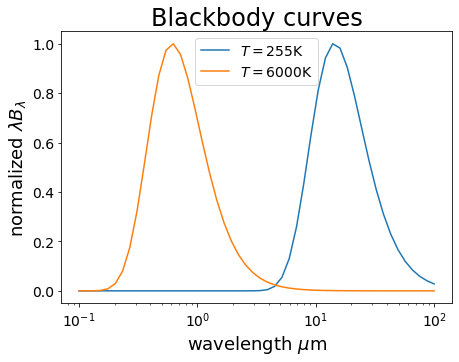

In [4]:
from scipy.constants import c, h, k
import numpy as np
import matplotlib.pyplot as plt

lw = lw / lw.max()
sw = sw / sw.max()

fig, ax = plt.subplots(figsize=(7,5))
ax.semilogx(wave_length, lw, label="$T=255$K")
ax.semilogx(wave_length, sw, label="$T=6000$K")
ax.set_title("Blackbody curves", fontsize=24)
ax.set_xlabel("wavelength $\mu$m", fontsize=18)
ax.set_ylabel("normalized $\lambda B_\lambda$", fontsize=18)
ax.tick_params(labelsize=14)
ax.legend(fontsize=14)
plt.show()

## 配列

前節ではNumPyに含まれる指数函数を使いました。NumPyには数学函数が多数定義されているだけでなく，ndarrayと呼ばれる配列が提供されていることが特長です。配列はリストに似ていますが，メモリ上で連続的に配置され高速にアクセスすることができます。配列に対する数学函数や線型代数演算を高速に行うことができます。PythonはFortranやCなどのコンパイル型言語と比較して100倍程度遅いのですが，ndarrayに対する演算はライブラリを呼び出すことによって行われるため，コンパイル型言語に遜色ないスピードで行うことが可能です。

2.5度の等緯度経度格子をndarrayで作成してみましょう。

In [5]:
import numpy as np


nlon = 144
nlat =  73
lon = 360 / nlon * np.arange(nlon)
lat = np.linspace(-90, 90, nlat)

`np.arange(start, end, step)`は指定した間隔`step`で等間隔の値を生成します。既定では最初の値`start`は0，間隔`step`は1であり，Pythonの`range()`同様に連続する整数を生成します。`end`は含まれません。`np.arange()`は整数でない間隔を持つ値を生成することもできます。

In [6]:
dlon = 360 / nlon
lon = np.arange(0, 360, dlon)

としても同様に経度を生成できます。`np.linspace()`は指定された範囲を等間隔に分割した数を返します。

FortranやCのように要素毎に値を計算することもできます。

In [15]:
lon = np.zeros(nlon)
dlon = 360 / nlon
for i in range(nlon):
    lon[i] = dlon * i

`np.zeros()`は指定した数0が並んだ配列を返します。`np.ones()`は1が並んだ配列，`np.array()`は値が初期化されていない配列を返します。`for`文は繰り返し処理を行います。`range()`で生成された`0`から`nlon-1`までの値が順番に`i`に入り，字下げされたブロックが実行されます。`for`の行が`:`で終わっていることに注意してください。また，Cのようにブロックを`{}`で囲ったり，Fortranのように`end do`のようなループの終了するための文を書いたりする必要はありません。字下げにより分かりやすく少ない行数で書けることがPythonの特長です。

ループはNumPyが呼び出すライブラリではなく，Pythonの文として実行されるため，高速であるNumPyの特長を活かすことができません。なるべくループを使わないで書くことが速いコードを書くコツです。

緯度は，短く書けるリスト内包表記を使ってみましょう。

In [16]:
dlat = 180 / (nlat - 1)
lat = np.array([-90 + dlat * j for j in range(nlat)])

ここにも`for`がありますが，リストの内側に包まれているのでリスト内包表記といいます。`range()`で生成される0からnlat-1までの整数に対する要素からなるリストが作られ，`np.array()`で配列に変換されます。

NumPyの線型代数演算等については，この後の章で取り上げます。

## Fortran資産の活用

数値計算手法は60～80年代にかけて基本的なアルゴリズムが提案され，多くの優れたコードが蓄積されてきました。多くのコードはFortranで書かれています。ここでは，既存のFortranコードをNumPyの一部として提供されているf2pyを使って，Pythonから呼び出してみましょう。

データを使ってみようと思ったら，緯度方向が不等間隔だったということはありませんか。JRA-55等のモデル面データがこれに該当し，ガウス緯度と呼ばれています。ガウス緯度に格子点を配置するのは精度を向上させるためです。ガウス緯度はメタデータとして提供されることもありますが，格子点数が与えられれば計算で求めることができます。Pythonで実装することも可能ですが，ここではSPHEREPACKに含まれている`gaqd.f`を利用します。

SPHEREPACKはUCARから提供されています。DownloadタブのI agreeボタンをクリックするとソースやドキュメントのページが表示されます。氏名等を登録する必要はありません。これまでに述べた方法でPythonからダウンロードしてもいいのですが，ここでは`curl`コマンドで取得し，`tar`コマンドで展開します。`gaqd.f`は単体で動作するので，カレントディレクトリにコピーを作成します。

In [17]:
!curl -O https://www2.cisl.ucar.edu/sites/default/files/spherepack3.2.tar
!tar xvf spherepack3.2.tar
!cp spherepack3.2/src/gaqd.f .

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 3537k    0  6855    0     0   6855      0  0:08:48  0:00:01  0:08:47  5484
100 3537k  100 3537k    0     0  3537k      0  0:00:01  0:00:01 --:--:-- 2155k
x spherepack3.2/
x spherepack3.2/doc/
x spherepack3.2/lib/
x spherepack3.2/make.inc
x spherepack3.2/Makefile
x spherepack3.2/objs/
x spherepack3.2/output/
x spherepack3.2/src/
x spherepack3.2/test/
x spherepack3.2/test/Makefile
x spherepack3.2/test/tdiv.f
x spherepack3.2/test/testrssph.f
x spherepack3.2/test/testrvsph.f
x spherepack3.2/test/testsshifte.f
x spherepack3.2/test/testvshifte.f
x spherepack3.2/test/testvtsgs.f
x spherepack3.2/test/tgaqd.f
x spherepack3.2/test/tgrad.f
x spherepack3.2/test/tidvt.f
x spherepack3.2/test/tsha.f
x spherepack3.2/test/tshpe.f
x spherepack3.2/test/tshpg.f
x sphe

`f2py`はFortranのソースを解析し，Pythonから呼び出せる共有ライブラリを生成します。`f2py`の使い方は簡単です。

In [18]:
!python -m numpy.f2py -c gaqd.f -m gaqd

running build
running config_cc
unifing config_cc, config, build_clib, build_ext, build commands --compiler options
running config_fc
unifing config_fc, config, build_clib, build_ext, build commands --fcompiler options
running build_src
build_src
building extension "gaqd" sources
f2py options: []
f2py:> C:\Users\subhi\AppData\Local\Temp\tmp_a_48mjz\src.win-amd64-3.9\gaqdmodule.c
creating C:\Users\subhi\AppData\Local\Temp\tmp_a_48mjz\src.win-amd64-3.9
Reading fortran codes...
	Reading file 'gaqd.f' (format:fix,strict)
Post-processing...
	Block: gaqd
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "nlat".
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "lwork".
{}
In: :gaqd:gaqd.f:gaqd
vars2fortran: No typespec for argument "ierror".
			Block: gaqd
{}
In: :gaqd:gaqd.f:cpdp
vars2fortran: No typespec for argument "n".
			Block: cpdp
{}
In: :gaqd:gaqd.f:tpdp
vars2fortran: No typespec for argument "n".
			Block: tpdp
			Block: dzeps
Post-processing (stage 2)..

error: extension 'gaqd' has Fortran sources but no Fortran compiler found


`python`コマンドの`m`オプションで`numpy.f2py`を指定します。環境によっては`f2py`コマンドが使えますが，上記の方法では`python`コマンドのバージョンと一貫した`f2py`が用いられます。Colaboratoryには`f2py`があるようですが，上記の方法でないとうまくいきませんでした。

コマンドを実行し無事`gaqd`で始まり`.so`で終わるファイル名の共有ライブラリが生成されれば，おなじみの`import`コマンドを使って読むことができます。

In [ ]:
import gaqd
print(gaqd.gaqd.__doc__)

自動生成されたドキュメントが表示されるはずです。

```
gaqd(theta,wts,w,lwork,ierror,[nlat])

Wrapper for ``gaqd``.

Parameters
----------
theta : input rank-1 array('d') with bounds (nlat)
wts : input rank-1 array('d') with bounds (nlat)
w : input float
lwork : input int
ierror : input int

Other Parameters
----------------
nlat : input int, optional
    Default: len(theta)
```

`gaqd`には過去のバージョンに適合させるために使っていない作業配列とその長さが引数にあります。また，ガウス余緯度とガウス重みを準備して渡す必要があります。余緯度は北極から測り90°－緯度です。これらの長さはガウス余緯度の配列の長さから推定できるのでオプションになっています。その結果一つだけFortranよりも引数が短くなっています。

In [ ]:
import numpy as np


nlat = 32
theta = np.zeros(nlat)
wts = np.zeros(nlat)
gaqd.gaqd(theta, wts, 1.0, 1, 1)

np.rad2deg(theta)を実行すると0°よりも少し大きい値から180°より少し小さい値が表示されます。重みは

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots()
ax.scatter(theta, wts)

で描くことができます。重みの和`wts.sum()`は2に近い値になるはずです。

ソースコードに少し手を入れて，Pythonらしく引数を簡単にしてみましょう。変数の宣言87行目の後に
 
```Fortran
Cf2py intent(in) nlat
Cf2py intent(out) theta
Cf2py intent(out) wts
Cf2py intent(hide) w
Cf2py intent(hide) lwork
Cf2py intent(hide) ierror
```
を入れます。`C`で始まるのでFortranから見るとコメント行ですが，その後に`f2py`がついているのでf2pyに対する指示行になります。Fortran 90のインテント属性を拡張した記法で引数について記述します。`nlat`を`intent(in)`の必須とします。`theta`と`wts`は`intent(out)`とし，引数からは隠され返り値になります。`intent(out)`とすると，引数から隠す`intent(hide)`も同時に指定されるからです。`w`, `lwork`, `ierror`に`intent(hide)`を指定して隠します。Colaboratoryでは，一番左のフォルダのアイコンをクリックしてファイルを表示して`gaqd.f`をダブルクリックすると編集できます。編集後閉じると自動保存されます。

指示行を追加して保存したら，再度`f2py`を実行します。モジュール名はソースコードと別でも構わないのでここでは`spherepack`としています。

In [ ]:
!python -m numpy.f2py -c -m spherepack gaqd.f

改変されたソースから作成したモジュールでは引数が`nlat`で返り値が`theta`と`wts`になり使いやすくなりました。

In [ ]:
from spherepack import gaqd
print(gaqd.__doc__)
theta,wts = gaqd(nlat)

```
Wrapper for ``gaqd``.
 
Parameters
----------
nlat : input int
 
Returns
-------
theta : rank-1 array('d') with bounds (nlat)
wts : rank-1 array('d') with bounds (nlat)
```

余緯度でなく緯度に変換して返す関数は次のように書けます。NCLの`gaus()`同様に緯度方向の格子点数を渡すだけでガウス緯度とガウス重みが計算できるようになりました。

In [ ]:
from spherepack import gaqd


def gaus(n):
    theta, wts = gaqd(n)
    return np.arcsin(np.cos(theta)), wts

この章ではとにかく図を描いてみるところからはじめて，関数定義のしかたやNumPyの配列の使い方を学びました。Fortranコードを使うところは少し難しかったかもしれませんが，Pythonの欠点を補い，これまでの豊富な資産を活かすことができることを理解していただけたかと思います。

次の章では様々なデータを読んで可視化していきます。